**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Thermal modeling of the bricks of the FIRES project
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  Shubojit Banerjee & Julián Barra <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** Stephen Lam

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**20 Dec 2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [Tests](#tests)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The problem we're trying to tackle in this project is that of obtaining a thermal model of the bricks used in the FIRES project, a project which is the focus of the doctoral thesis of Daniel Stack of the MIT, who is working alongside professor Stephen Lam of the University of Massachusetts-Lowell. We're doing this project as part of the research we're doing for professor Stephen Lam.

The FIRES project consists of an idea of using specially-doped aluminum oxide bricks to store energy in the form of heat. The bricks would be used both as the storage medium due to their high heat capacity and also as the heat generators themselves: in periods where there is an excess production of energy, the bricks can operate as electrical resistors. The current would be passed to the resistors and they would heat up due to the Joule effect. After that, the energy stored in the bricks can be recovered by cooling the bricks by forced convection and then using the hot air in applications where process heat is required. The heat can also be converted back into electricity by using the heat in one of many available power generation cycles, like the Rankine cycle, the Brayton cycle, etc.

It is of special importance, then, to model the thermal behavior of the bricks. Of special importance to us is to examine the possibility of thermal runway in the bricks: the bricks would be doped with certain components to give them the property of having an electrical resistivity which decreases with higher temperatures. The purpose of this is to try to make the whole system thermally self-regulating, but there is uncertainty on whether the bricks would behave as a circuit of in-series or parallel resistors. In the second case, the uneven heating of the bricks might cause a positive feedback loop in the bricks with the generation of hot points. This is also compounded by the fact that thermal conductivity also tends to decrease with higher temperatures, so the heat can't be conducted away as easily.

Sadly, to fully model the possibility of thermal runway, we would need to make both thermal conductivity and electrical resistivity dependent on temperature, which is beyond the scope of this course. As such, this project will be about a preliminary thermal model of the bricks of the FIRES project.

## [Problem Statement](#toc)<a id="problem"></a>

The problem as we're trying to solve here is a Poisson problem of the following form:

\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr)., \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}

In this problem, k represents the thermal diffusion, or thermal conductivity, coefficient. f(x) refers to the heat source along the bricks.

The domain of the problem is admitedly a bit difficult to define, since the bricks have a very uneven form that is difficult to model as a 1D problem. Aside from that, the bricks themselves are not fully modeled with regards to the dimensions they would take in the finished commercial product. In his *Applied Energy* paper, Stack et al. postulate a model in which the bricks have several long holes for air to flow through. The walls between all those holes would be all 5 cm thick. We will model the heat profile of the bricks along one of the walls, then. As such, the domain is defined as this:

\begin{align*}
x\in [0,0.05]
\end{align*}

At both ends of the domain, the walls would be in contact with the air, which will be made to flow to cool the bricks by forced convection. The boundary conditions at both ends of the domain, then, would be defined as a pair of Robin boundary condition, in the way we showed for the formulation of the problem above.

\begin{align*}
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr). \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}

The reference temperature (represented above by $u_\text{ref}$) would be the ambient temperature of air. For a problem with the same temperature at both ends, we would have a temperature of 20 degrees celsius cooling the wall of the bricks at both ends.

\begin{align*}
 T_{ref} &= 20\; [°C] \\
\end{align*}

We want, however, to introduce some level of asymmetry to the problem since the main reason why there coud be thermal runway in the system is due to the bricks heating up unevenly. While we've already said that the modeling of the thermal runway will not be done here on the project, we can still introduce a very preliminary form of this by using RobinBC, but with the reference temperatures being different at both ends of the domain. We choose to do this with a 20 degrees difference in the temperatures:

\begin{align*}
 T_{ref,a} &= 20\; [°C] \\
 T_{ref,b} &= 40\; [°C] \\
\end{align*}

The heat transfer coefficient will depend on the speed of the air being channeled through the bricks. However, even when the bricks are used to store energy instead of returning (that is, with the air being stagnant), the heat transfer coefficient will take on a positive value. Stack himself uses the following value for the coefficient with stagnant air in his *Applied Energy* paper:

\begin{align*}
 h &= 10\; \left [ \frac{W}{m^{2}K} \right ] \\
\end{align*}

What we have to define now are the functions for the thermal conductivity and the source. For the thermal conductivity, we used values found in Shackleford's *CRC Materials Science and Engineering Handbook*, plotted them in Excel and found a fitting polynomial function for the values of temperature. We obtained the following function:

\begin{align*}
 k(T) &= (2,49E-5)\cdot T^{2}-0,05875 \cdot T +40,85\; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

We might make the conductivity dependant on temperature in the future. As for now, we can't make it dependent on the temperature, so an aproximation of this will necessarilly be imperfect, since the value of the temperature is needed to know the value of the conductivity and that of the conductivity is needed for the temperature. We don't know the values of the temperature at the ends of the domain, even. A first approximation of the value of the conductivity will be of it as a linear function, with the values at the end being those that the thermal conductivity takes at the reference temperatures at the ends of the domain.

\begin{align*}
 k(T_{ref,a}) &= 25,777\; \left [ \frac{W}{mK} \right ]  \\
 k(T_{ref,b}) &= 24,903\; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

The function for the conductivity dependent on the position will be of this form:

\begin{align*}
 k(x) &= 25,777-17,469 \cdot x \; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

We were extremely close to implementing this function in our MOOSE code. Due to us running out of time, however, we were forced to instead use a constant value for the thermal conductivity:

\begin{align*}
 k &= 31 \; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

With regards to the heat source. The value of the generated heat will be given by Joule's Law. The formula is presented in the *Applied Energy* paper as follows:

\begin{align*}
F\left (x \right )=\dot{e}_{gen}=\frac{AV^{2}}{  L_{char} \rho }
\end{align*}

We need, however, a value for the density of the generated heat, which will be obtained by taking the formula presented above and dividing it by a unit of volume, which in this case would be a product of the transversal area and the characteristic length that Stack postulated in his paper. The formula, then, is as follows:

\begin{align*}
f\left (x \right ) = \frac{V^{2}}{  L_{char}^{2} \rho }
\end{align*}

The characteristic length being defined in the same paper as with a value of 5 cm:

\begin{align*}
L_{char} = 0,05 \left [ m \right ]
\end{align*}

The value of rho (electrical resistivity) in the formula is approximated in the same way as we did for that of thermal conductivity. We first oftain the following temperature-dependent formula:

\begin{align*}
\rho (T) &= (4,66E7)\cdot T^{2}-(9,86E10) \cdot T +(5,04E13)\; \left [ \Omega m \right ]  \\
\end{align*}

And one can evaluate the heat generating function with the . There is still the question of which value we should use for the voltage difference, however, and this is something we have absolutely no info on. Daniel Stack doesn't specify a value for the voltage either in his thesis or in the *Applied Energy* paper, and we have no antecedents of the voltage values to be used in this particular application. The value of the voltage being easily changeable, however, we can just introduce values to get some results for the sake of the project, and to have some interesting results to show. For this project, then, the value of the voltage difference in the resistor bricks will be the following:

\begin{align*}
V = 100 \left [ MV \right ]
\end{align*}

And for this, the value of the source at the ends of the domain is as follows:

\begin{align*}
 f_{s}(T_{ref,a}) &= 156940\; \left [ \frac{W}{m^{3}} \right ]  \\
 f_{s}(T_{ref,b}) &= 166117\; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

This again we can approximate as a linear position-dependent function, and we obtain:

\begin{align*}
f(x) &= 156940+185543 \cdot x \; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

With this, we have everything we need to start programming.

## [Objectives](#toc)<a id="obj"></a>

- State a consistent Rayleigh-Ritz form for the Poisson problem
- Using the Rayleigh-Ritz method, compute the temperature and the Heat flux along the x position of the brick wall. Obtain results that can be compared to those that can be obtained by the use of MOOSE.

## [Approach](#toc)<a id="app"></a>

We will present the statement of the problem we want to solve using hand-written code. The problem corresponds to a Poisson 1D problem and we will solve it by the Rayleigh-Ritz method as coded by hand.

### [Problem Statement](#toc)<a id="weakform"></a> 


The problem, as we mentioned before, can be stated as follows:

\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr)., \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}


We only have one domain: that of the position along the thickness of the brick wall. The weak form on this domain will then be to find u, so that the constrained Poisson energy norm is minimized:

\begin{equation*}
  \norm{u_0+w-u^*_N}^2_{\varepsilon } = \min\limits_{u_N\, \in\, V_N} \norm{u_0+w-u_N}^2_{\varepsilon },
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, and any $w \in V$ with $w(a) = u_a$, $w(b) = u_b$ is called the *lift* function. $u_0 \in V(a,b)$ is the solution of the homogeneous problem.



### Domain
Below we have a picture we use the illustrate the domain of the problem. The picture to the left isn't the domain but it shows the general structure (as of yet, not completely decided) of the bricks of the FIRES project, that is, of heat storage bricks with channels for air circulation through it. It is across one of the walls separating these channels that we decide to model our system. As such, the picture to the right corresponds to the domain: we will model the temperature across one of the thin walls between the channels.

/Users/joker/opt/anaconda3/envs/moose/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


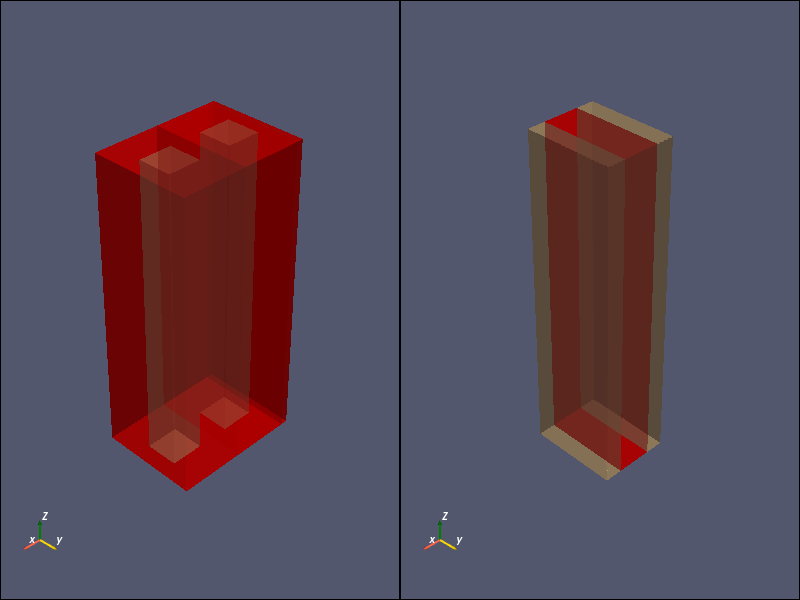

In [1]:
'''Domain'''
import pyvista as pv
def show_domain(screenshot=False):
   
    pv.set_plot_theme('paraview')

    
    #coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    brick1=pv.Box(bounds=(0.0, 4, 0.0, 6, 0.0, 18.0), level=2, quads=True,)
    air1=pv.Box(bounds=(1, 3, 2, 4, 0.0, 18.0), level=2, quads=True,)
    #air2=pv.Box(bounds=(1, 1.5, 0, 5, 0.0, 18.0), level=0, quads=True,)
    brick2=pv.Box(bounds=(0.4, 8, 0.0, 6, 0.0, 18.0), level=2, quads=True,)
    air2=pv.Box(bounds=(5, 7, 2, 4, 0.0, 18.0), level=2, quads=True,)
    #fir 3D cross-section
    air3=pv.Box(bounds=(0, -1, 0, 5, 0.0, 18.0), level=0, quads=True,)
    brick3=pv.Box(bounds=(0.0, 2, 0.0, 5, 0.0, 18.0), level=2, quads=True,)
    air4=pv.Box(bounds=(2, 3, 0, 5, 0.0, 18.0), level=0, quads=True,)
    plo = pv.Plotter(notebook=True, shape=(1,2))
    plo = pv.Plotter(shape=(1,2)) 
    

    plo.subplot(0,0)
    
    plo.add_mesh(brick1, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air1, color='tan', opacity=.99)
    plo.add_mesh(brick2, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air2, color='tan', opacity=.99)
    plo.add_axes(xlabel='x', ylabel='y', zlabel='Z')

    plo.subplot(0,1)
    
    plo.add_mesh(brick3, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air3, color='tan', opacity=.99)
    #plo.add_mesh(brick2, color='red', opacity=.80)
    #plo.add_mesh(air1, color='tan', opacity=0.99)
    plo.add_mesh(air4, color='tan', opacity=.99)
    plo.add_axes(xlabel='x', ylabel='y', zlabel='Z')
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')
show_domain()

### [Definition of the necessary functions](#toc)<a id="kernels"></a>

In [2]:
'''Generate the target function f'''
import matplotlib.pyplot as plt
import math as m
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import quad

### [Tests](#toc)<a id="tests"></a>

### [Setup](#toc)<a id="setup"></a>

In [3]:
'''Domain'''
'''Rayleigh Ritz Method with Lagrange FE Basis Functions'''
x_min=0
x_max=0.05

degree = 2  #Degree of the lagrange polinomials used
n_elem = 10 #Number of elements used

In [4]:
'''Domain partition'''
def get_domain_partition(degree, n_elem, x_min, x_max, bc_x_min='essential', bc_x_max='essential'):
    #assert degree == 1
    # Local node numbering on parent domain
    # --0--------------1---->
    #  -1      0      +1    zetta
    gnodes_x = np.linspace(x_min, x_max, n_elem*degree+1, dtype=np.float64)
    patches = list()
    local_to_global_node_id_map = list()
    for e in range(n_elem):
        gnode_id_1 = degree*e   #left
        gnode_id_2 = degree*e+1 #center
        gnode_id_3 = degree*e+2 #right
        x1 = gnodes_x[gnode_id_1]
        x2 = gnodes_x[gnode_id_2]
        x3 = gnodes_x[gnode_id_3]
        # Local node id:  0   1
        patches.append((x1, x2, x3))
        # Local node id:                        0           2             1
        local_to_global_node_id_map.append([gnode_id_1, gnode_id_2,  gnode_id_3])
    if bc_x_min == 'essential':
        local_to_global_node_id_map[0][0] = -1
    if bc_x_max == 'essential':
        local_to_global_node_id_map[-1][-1] = -1
    return (patches, gnodes_x, local_to_global_node_id_map)

In [5]:
'''Parent mapping'''
def get_parent_mapping():
    # zetta in [-1,1]
    parent_mapping = lambda zetta, x_e_bar, h_e: x_e_bar + h_e/2*zetta # compute x
    parent_mapping_prime = lambda h_e: h_e/2                           # compute mapping derivative wrt zetta
    # x in Omega_e
    inverse_parent_mapping = lambda x, x_e_bar, h_e: (x - x_e_bar)*2/h_e # compute zetta
    return (parent_mapping, parent_mapping_prime, inverse_parent_mapping)

In [6]:
'''The basis functions'''
def get_parent_basis_functions():
    parent_basis_func_list = list()
    parent_basis_func_prime_list = list()
    parent_basis_func_list.append(lambda zetta: (zetta**2-zetta)/2)  # left
    parent_basis_func_list.append(lambda zetta: -(zetta**2-1))  # middle
    parent_basis_func_list.append(lambda zetta:  (zetta**2+zetta)/2)  # right
    parent_basis_func_prime_list.append(lambda zetta: (2*zetta-1)/2) # left
    parent_basis_func_prime_list.append(lambda zetta: -2*zetta) # middle
    parent_basis_func_prime_list.append(lambda zetta:  (2*zetta+1)/2) # right
    return (parent_basis_func_list, parent_basis_func_prime_list)

In [7]:
'''Again the function for the obtaining of the basis functions'''
def global_basis_function(i, x, domain_partition, parent_mapping, parent_basis_functions):
  
    try:
        len(x)
    except TypeError:
        x = np.array([x])
  
    if not isinstance(x, np.ndarray):
       assert isinstance(x, list) or isinstance(x, tuple)
       x = np.array(x)
  
    phi_i_x = np.copy(x) * 0.0 # initialization
    phi_prime_i_x = np.copy(x) * 0.0 # initialization
        
    patches = domain_partition[0]
    local_to_global_node_id_map = domain_partition[2]
    inverse_parent_mapping = parent_mapping[2]
    
    parent_basis_func_list = parent_basis_functions[0]
    parent_basis_func_prime_list = parent_basis_functions[1]
  
    # expensive reverse lookup
    for j, x_j in enumerate(x):
        for e, nodes_x in enumerate(patches):
            if nodes_x[0] <= x_j <= nodes_x[-1]:
                n_lnodes = len(nodes_x)
                for I in range(n_lnodes):
                    if local_to_global_node_id_map[e][I] == i:
                        x_e_bar = (nodes_x[0] + nodes_x[-1])/2
                        h_e = nodes_x[-1] - nodes_x[0]
                        zetta = inverse_parent_mapping(x_j, x_e_bar, h_e)
                        phi_i_x[j] = parent_basis_func_list[I](zetta)
                        phi_prime_i_x[j] = parent_basis_func_prime_list[I](zetta)
                break
    return [phi_i_x, phi_prime_i_x]

In [8]:
'''All global basis functions'''
def get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function):
    
    basis_func_list = list()
    basis_func_prime_list = list()
    n_gnodes = domain_partition[1].size
    local_to_global_node_id_map = domain_partition[2]
    phi_i = lambda i, x: global_basis_function(i,x, domain_partition,parent_mapping,parent_basis_functions)[0]
    phi_prime_i = lambda i, x: global_basis_function(i,x, domain_partition,parent_mapping,parent_basis_functions)[1]

    visited = [False]*n_gnodes
    for e in range(n_elem):
        for I in range(len(local_to_global_node_id_map[e])):
            gnode_id = local_to_global_node_id_map[e][I]
            if gnode_id >= 0 and not visited[gnode_id]:
                      basis_func_list.append(lambda x, i=gnode_id: phi_i(i,x))
                      basis_func_prime_list.append(lambda x, i=gnode_id: phi_prime_i(i,x))
                        
                      visited[gnode_id] = True
  
    assert len(basis_func_list) >= 1, 'There are no basis functions to build.'
    return [basis_func_list, basis_func_prime_list]

In [9]:
'''Pedagogical inner product'''
def inner_product(u, v, patches):
    integrand = lambda x: u(x) * v(x)          
    inner_product = 0.0
    for nodes_x in patches:
        (inner_product_e, _) = quad(integrand, nodes_x[0], nodes_x[-1])
        inner_product += inner_product_e
        
    return inner_product

#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


The first test will be done with Dirichlet BC and using constant conductivity and source. The Dirichlet Boundary conditions are as follows:

\begin{align*}
T_{a}=20\; [°C]
\end{align*}

\begin{align*}
T_{b}=40\; [°C]
\end{align*}

Some parameters will be defined next. We define a constant value of $31 \left [ \frac{W}{mK} \right ] $ and a value of $156940\; \left [ \frac{W}{m^{3}} \right ]$ for the heat generation density

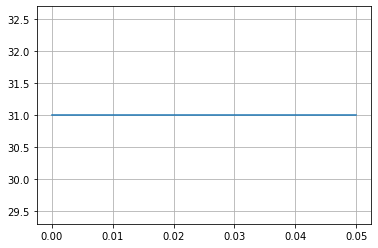

In [10]:
'''Parameters'''
'''Thermal conductivity'''
#Cond_shape_pts = [(0,31.93),(0.05,29.94)]
Cond_shape_pts = [(0,31),(0.05,31)]
Cond=np.array(Cond_shape_pts)

f_cond=interp1d(Cond[:,0],Cond[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_cond(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

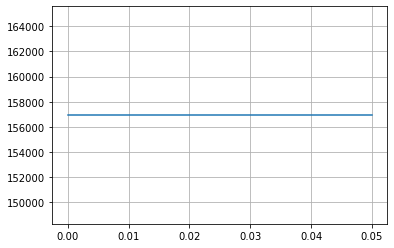

In [11]:
'''Source bias'''
roh=4085.7

V=300000
#V=0
L_char=0.05
A=0.05*1

#Use of points to build the source bias function

Source_shape_pts = [(0,156940),(0.05,156940)]
source=np.array(Source_shape_pts)

f_sourcebias=interp1d(source[:,0],source[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_sourcebias(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

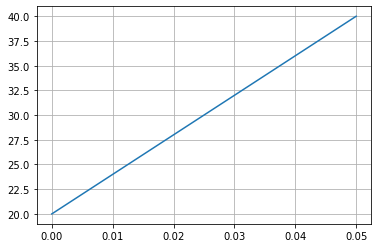

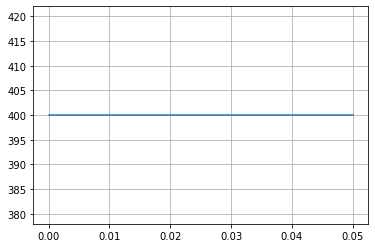

In [12]:
'''Data (boundary conditions for testing purposes)'''
'''Building the lift function'''
u_a=20
u_b=40

Lift_shape_pts = [(0,u_a),(0.05,u_b)]
Lift=np.array(Lift_shape_pts)
f_lift=interp1d(Lift[:,0],Lift[:,1])

f_prime=((u_b-u_a)/(x_max-x_min))
Lift_prime_shape_pts = [(0,f_prime),(0.05,f_prime)]
Lift_prime=np.array(Lift_prime_shape_pts)
f_lift_prime=interp1d(Lift_prime[:,0],Lift_prime[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_lift(np.linspace(0,0.05,200)))
plt.grid()
plt.show()

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_lift_prime(np.linspace(0,0.05,200)))
plt.grid()
plt.show()

In [13]:
'''FEM Solution'''
domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

In [14]:
#Building of the A matrix
A_mtrx = np.zeros((len(phi_list), len(phi_list)), dtype=np.float64)
patches = domain_partition[0]
for i in range(len(phi_list)):
    for j in range(len(phi_list)):
        
        phi_i=phi_list[i]
        phi_j=phi_list[j]
        
        phi_prime_i=phi_prime_list[i]
        phi_prime_j=phi_prime_list[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond(x) * ((2/h_e)*phi_prime_j(x))
        
        prima = lambda x: phi_prime_i(x)*(2/h_e)
        
        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches)

In [15]:
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list), dtype=np.float64)
patches = domain_partition[0]

for i in range(len(phi_list)):
    phi_i=phi_list[i]
    phi_prime_i=phi_prime_list[i]
    
    b_vec[i] = inner_product(f_sourcebias, phi_i, patches)
    
    first_term = lambda x: f_lift_prime(x)*f_cond(x)
    phi_prima_i = lambda x: phi_prime_i(x)*(2/h_e)
    
    b_vec[i] -= inner_product(first_term, phi_prima_i, patches)

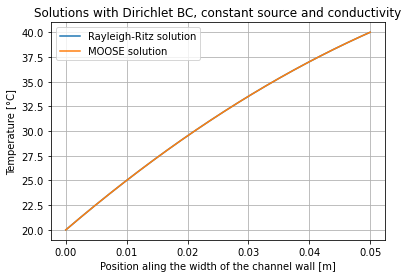

The value of the function at the leftmost end of the domain is: 20.00 [°C].
The value of the function at the rightmost end of the domain is: 40.00 [°C].
The value of the relative difference between the two solutions is: 2.533891E-19.


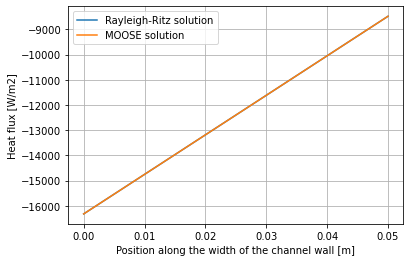

q_na computed =  [-16323.5]
q_nb computed =  [-8476.5]
The value of the relative difference between the two solutions is: 8.604691E-17.


In [16]:
'''Solution'''
'''Compute optimal coefficient vector'''
c_star_vec = np.linalg.solve(A_mtrx, b_vec)

'''Plot comparison of f and g_best_vec'''
def u_star(x):
    g_x=f_lift(x)
    for (j,phi_i) in enumerate(phi_list):
        g_x=g_x+(c_star_vec[j])*phi_i(x)
    return g_x

def u_star_prime(x):
    g_x=f_lift_prime(x)
    for j in range(len(phi_list)):
        g_x=g_x+(c_star_vec[j])*((2/h_e)*phi_prime_list[j](x))
    return g_x

#Importing MOOSE temperature vector
cam=pd.read_csv('output_Dirichlet_constant_0002.csv',sep=",")
Temp_MOOSE=np.array(cam['u'][:])
Flux_MOOSE=np.array(cam['diffFluxU_r'][:])


plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),u_star(np.linspace(x_min,x_max,2000)),label='Rayleigh-Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Temp_MOOSE,label='MOOSE solution')
#plt.plot(np.linspace(x_min,x_max,2000),sol(np.linspace(x_min,x_max,2000)),label='Analytic solution')
plt.title('Solutions with Dirichlet BC, constant source and conductivity')
plt.xlabel("Position aling the width of the channel wall [m]")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.grid()
plt.show()

print('The value of the function at the leftmost end of the domain is: %4.2f [°C].'%u_star(x_min))
print('The value of the function at the rightmost end of the domain is: %4.2f [°C].'%u_star(x_max))

#Calculation the L_2 norm error
x_1norm=np.sum((u_star(np.linspace(x_min,x_max,2000)))**2)
resnorm=np.sum((Temp_MOOSE-u_star(np.linspace(x_min,x_max,2000)))**2)

Rel_test=resnorm/x_1norm

print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

#Plotting the flux
plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000))),label='Rayleigh-Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Flux_MOOSE,label='MOOSE solution')
plt.xlabel("Position along the width of the channel wall [m]")
plt.ylabel("Heat flux [W/m2]")
plt.legend()
plt.grid()
plt.show()

'''Flux at boundary'''
print('q_na computed = ', -f_cond(x_min)*u_star_prime(x_min))
print('q_nb computed = ', -f_cond(x_max)*u_star_prime(x_max))

#Calculate the L_2 norm error (Flux)
hand_flux=-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000)))
x_1norm=np.sum((hand_flux)**2)
resnorm=np.sum((Flux_MOOSE-hand_flux)**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

#### [Test 2](#toc)<a id="1dsolofueldirichletrobin"></a>

The second test will be done with Robin BC and using constant conductivity and source. Therefore, we won't be changing most of the parameters for this one. We do need to change the way the domain is partitioned, however:

In [17]:
'''Parameters'''
h = 10      #Heat transfer coefficient

In [18]:
'''FEM Solution'''
'''Domain partition'''
def get_domain_partition(degree, n_elem, x_min, x_max, bc_x_min='flux', bc_x_max='flux'):
    #assert degree == 1
    # Local node numbering on parent domain
    # --0--------------1---->
    #  -1      0      +1    zetta
    gnodes_x = np.linspace(x_min, x_max, n_elem*degree+1, dtype=np.float64)
    patches = list()
    local_to_global_node_id_map = list()
    for e in range(n_elem):
        gnode_id_1 = degree*e   #left
        gnode_id_2 = degree*e+1 #center
        gnode_id_3 = degree*e+2 #right
        x1 = gnodes_x[gnode_id_1]
        x2 = gnodes_x[gnode_id_2]
        x3 = gnodes_x[gnode_id_3]
        # Local node id:  0   1
        patches.append((x1, x2, x3))
        # Local node id:                        0           2             1
        local_to_global_node_id_map.append([gnode_id_1, gnode_id_2,  gnode_id_3])
    if bc_x_min == 'essential':
        local_to_global_node_id_map[0][0] = -1
    if bc_x_max == 'essential':
        local_to_global_node_id_map[-1][-1] = -1
    return (patches, gnodes_x, local_to_global_node_id_map)

domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

In [19]:
#Building of the A matrix
A_mtrx = np.zeros((len(phi_list), len(phi_list)), dtype=np.float64)
patches = domain_partition[0]
for i in range(len(phi_list)):
    for j in range(len(phi_list)):
        
        phi_i=phi_list[i]
        phi_j=phi_list[j]
        
        phi_prime_i=phi_prime_list[i]
        phi_prime_j=phi_prime_list[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond(x) * ((2/h_e)*phi_prime_j(x))
        
        prima = lambda x: phi_prime_i(x)*(2/h_e)
        
        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches) + h*phi_i(x_min)*phi_j(x_min) + h*phi_i(x_max)*phi_j(x_max)

In [20]:
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list), dtype=np.float64)
patches = domain_partition[0]

for i in range(len(phi_list)):
    phi_i=phi_list[i]
    phi_prime_i=phi_prime_list[i]
    
    b_vec[i] = inner_product(f_sourcebias, phi_i, patches)-h*(f_lift(x_max)-u_b)*phi_i(x_max)-h*(f_lift(x_min)-u_a)*phi_i(x_min)
    
    first_term = lambda x: f_lift_prime(x)*f_cond(x)
    phi_prima_i = lambda x: phi_prime_i(x)*(2/h_e)
    
    b_vec[i] -= inner_product(first_term, phi_prima_i, patches)

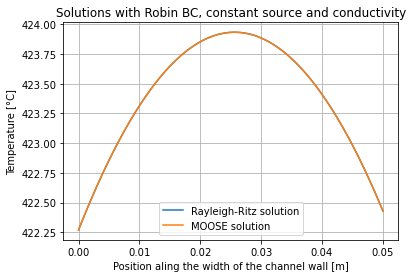

The value of the function at the leftmost end of the domain is: 422.27 [°C].
The value of the function at the rightmost end of the domain is: 422.43 [°C].
The value of the relative difference between the two solutions is: 9.690586E-25.


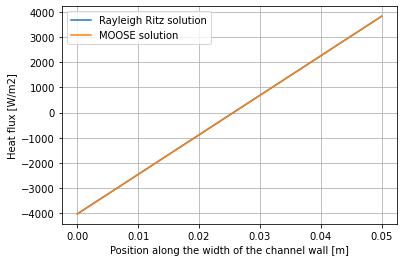

q_na computed =  [-4022.7]
q_nb computed =  [3824.3]
The value of the relative difference between the two solutions is: 2.251178E-21.


In [21]:
'''Solution'''
'''Compute optimal coefficient vector'''
c_star_vec = np.linalg.solve(A_mtrx, b_vec)


def u_star_prime(x):
    g_x=f_lift_prime(x)
    for j in range(len(phi_list)):
        g_x=g_x+(c_star_vec[j])*((2/h_e)*phi_prime_list[j](x))
    return g_x

#Importing MOOSE temperature vector
cam=pd.read_csv('output_Robin_constant_0002.csv',sep=",")
Temp_MOOSE=np.array(cam['u'][:])
Flux_MOOSE=np.array(cam['diffFluxU_r'][:])


plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),u_star(np.linspace(x_min,x_max,2000)),label='Rayleigh-Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Temp_MOOSE,label='MOOSE solution')
plt.title('Solutions with Robin BC, constant source and conductivity')
#plt.plot(np.linspace(x_min,x_max,2000),sol(np.linspace(x_min,x_max,2000)),label='Analytic solution')
plt.xlabel("Position aling the width of the channel wall [m]")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.grid()
plt.show()

print('The value of the function at the leftmost end of the domain is: %4.2f [°C].'%u_star(x_min))
print('The value of the function at the rightmost end of the domain is: %4.2f [°C].'%u_star(x_max))

#Calculate the L_2 norm error
x_1norm=np.sum((u_star(np.linspace(x_min,x_max,2000)))**2)
resnorm=np.sum((Temp_MOOSE-u_star(np.linspace(x_min,x_max,2000)))**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

#Plotting the flux
plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000))),label='Rayleigh Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Flux_MOOSE,label='MOOSE solution')
plt.xlabel("Position along the width of the channel wall [m]")
plt.ylabel("Heat flux [W/m2]")
plt.legend()
plt.grid()
plt.show()

'''Flux at boundary'''
print('q_na computed = ', -f_cond(x_min)*u_star_prime(x_min))
print('q_nb computed = ', -f_cond(x_max)*u_star_prime(x_max))

#Calculate the L_2 norm error (Flux)
hand_flux=-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000)))
x_1norm=np.sum((hand_flux)**2)
resnorm=np.sum((Flux_MOOSE-hand_flux)**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

#print(sol(np.linspace(x_min,x_max,2000)))


#print('q_nb given    = ', q_nb)
#print('flux error [%]= ',(-f_cond(x_max)*g_prime(x_max) - q_nb)/q_nb*100)

#### [Test 3](#toc)<a id="1dsolofueldirichletrobin"></a>

The third test will be done with Dirichlet BC and using source bias values that will be dependent on the position. The Dirichlet Boundary conditions are as follows:

\begin{align*}
T_{a}=20\; [°C]
\end{align*}

\begin{align*}
T_{b}=40\; [°C]
\end{align*}

We have to change a lot of the parameters and everything to reflect a changing source bias. All of these will be implemented just as we defined them in the introduction to the problem.

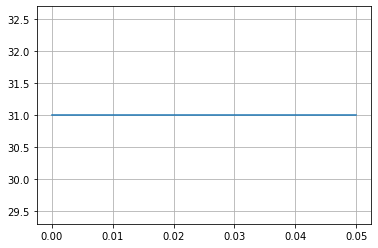

In [22]:
'''Parameters'''
'''Thermal conductivity'''
Cond_shape_pts = [(0,31),(0.05,31)]
#Cond_shape_pts = [(0,24.803),(0.05,25.777)]
Cond=np.array(Cond_shape_pts)

f_cond=interp1d(Cond[:,0],Cond[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_cond(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

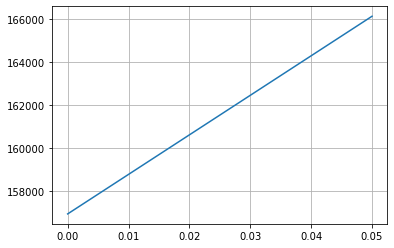

In [23]:
'''Source bias'''
Source_shape_pts = [(0,156940),(0.05,166117)]
source=np.array(Source_shape_pts)

f_sourcebias=interp1d(source[:,0],source[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_sourcebias(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

In [24]:
'''FEM Solution'''
'''Domain partition'''
def get_domain_partition(degree, n_elem, x_min, x_max, bc_x_min='essential', bc_x_max='essential'):
    #assert degree == 1
    # Local node numbering on parent domain
    # --0--------------1---->
    #  -1      0      +1    zetta
    gnodes_x = np.linspace(x_min, x_max, n_elem*degree+1, dtype=np.float64)
    patches = list()
    local_to_global_node_id_map = list()
    for e in range(n_elem):
        gnode_id_1 = degree*e   #left
        gnode_id_2 = degree*e+1 #center
        gnode_id_3 = degree*e+2 #right
        x1 = gnodes_x[gnode_id_1]
        x2 = gnodes_x[gnode_id_2]
        x3 = gnodes_x[gnode_id_3]
        # Local node id:  0   1
        patches.append((x1, x2, x3))
        # Local node id:                        0           2             1
        local_to_global_node_id_map.append([gnode_id_1, gnode_id_2,  gnode_id_3])
    if bc_x_min == 'essential':
        local_to_global_node_id_map[0][0] = -1
    if bc_x_max == 'essential':
        local_to_global_node_id_map[-1][-1] = -1
    return (patches, gnodes_x, local_to_global_node_id_map)

domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

In [25]:
#Building of the A matrix
A_mtrx = np.zeros((len(phi_list), len(phi_list)), dtype=np.float64)
patches = domain_partition[0]
for i in range(len(phi_list)):
    for j in range(len(phi_list)):
        
        phi_i=phi_list[i]
        phi_j=phi_list[j]
        
        phi_prime_i=phi_prime_list[i]
        phi_prime_j=phi_prime_list[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond(x) * ((2/h_e)*phi_prime_j(x))
        
        prima = lambda x: phi_prime_i(x)*(2/h_e)
        
        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches)

In [26]:
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list), dtype=np.float64)
patches = domain_partition[0]

for i in range(len(phi_list)):
    phi_i=phi_list[i]
    phi_prime_i=phi_prime_list[i]
    
    b_vec[i] = inner_product(f_sourcebias, phi_i, patches)
    
    first_term = lambda x: f_lift_prime(x)*f_cond(x)
    phi_prima_i = lambda x: phi_prime_i(x)*(2/h_e)
    
    b_vec[i] -= inner_product(first_term, phi_prima_i, patches)

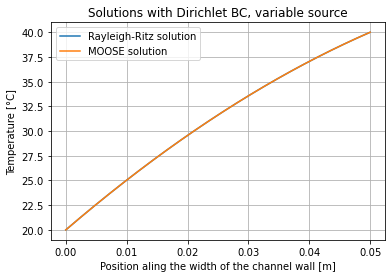

The value of the function at the leftmost end of the domain is: 20.00 [°C].
The value of the function at the rightmost end of the domain is: 40.00 [°C].
The value of the relative difference between the two solutions is: 1.379933E-10.


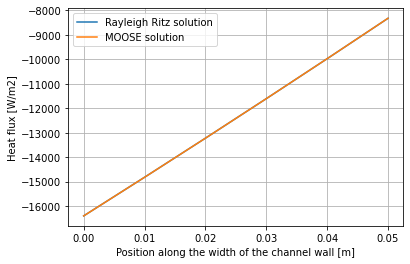

q_na computed =  [-16400.357375]
q_nb computed =  [-8323.932375]
The value of the relative difference between the two solutions is: 3.503511E-09.


In [27]:
'''Solution'''
'''Compute optimal coefficient vector'''
c_star_vec = np.linalg.solve(A_mtrx, b_vec)

#Importing MOOSE temperature vector
cam=pd.read_csv('output_Dirichlet_variable_0002.csv',sep=",")
Temp_MOOSE=np.array(cam['u'][:])
Flux_MOOSE=np.array(cam['diffFluxU_r'][:])

plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),u_star(np.linspace(x_min,x_max,2000)),label='Rayleigh-Ritz solution')
#plt.plot(np.linspace(x_min,x_max,2000),sol(np.linspace(x_min,x_max,2000)),label='Analytic solution')
plt.plot(np.linspace(x_min,x_max,2000),Temp_MOOSE,label='MOOSE solution')
plt.xlabel("Position aling the width of the channel wall [m]")
plt.title('Solutions with Dirichlet BC, variable source')
plt.ylabel("Temperature [°C]")
plt.legend()
plt.grid()
plt.show()

print('The value of the function at the leftmost end of the domain is: %4.2f [°C].'%u_star(x_min))
print('The value of the function at the rightmost end of the domain is: %4.2f [°C].'%u_star(x_max))

#Calculate the L_2 norm error
x_1norm=np.sum((u_star(np.linspace(x_min,x_max,2000)))**2)
resnorm=np.sum((Temp_MOOSE-u_star(np.linspace(x_min,x_max,2000)))**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

#Plotting the flux
plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000))),label='Rayleigh Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Flux_MOOSE,label='MOOSE solution')
plt.xlabel("Position along the width of the channel wall [m]")
plt.ylabel("Heat flux [W/m2]")
plt.legend()
plt.grid()
plt.show()

'''Flux at boundary'''
print('q_na computed = ', -f_cond(x_min)*u_star_prime(x_min))
print('q_nb computed = ', -f_cond(x_max)*u_star_prime(x_max))
#print('q_nb given    = ', q_nb)
#print('flux error [%]= ',(-f_cond(x_max)*g_prime(x_max) - q_nb)/q_nb*100)

#Calculate the L_2 norm error (Flux)
hand_flux=-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000)))
x_1norm=np.sum((hand_flux)**2)
resnorm=np.sum((Flux_MOOSE-hand_flux)**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

#### [Test 4](#toc)<a id="1dsolofueldirichletrobin"></a>

The fourth and final test will be done with Robin BC and a position-dependent source bias. The Robin BCs have been defined in the introduction already and the parameters we will use will be the same as the previous test.

In [28]:
'''FEM Solution'''
'''Domain partition'''
def get_domain_partition(degree, n_elem, x_min, x_max, bc_x_min='flux', bc_x_max='flux'):
    #assert degree == 1
    # Local node numbering on parent domain
    # --0--------------1---->
    #  -1      0      +1    zetta
    gnodes_x = np.linspace(x_min, x_max, n_elem*degree+1, dtype=np.float64)
    patches = list()
    local_to_global_node_id_map = list()
    for e in range(n_elem):
        gnode_id_1 = degree*e   #left
        gnode_id_2 = degree*e+1 #center
        gnode_id_3 = degree*e+2 #right
        x1 = gnodes_x[gnode_id_1]
        x2 = gnodes_x[gnode_id_2]
        x3 = gnodes_x[gnode_id_3]
        # Local node id:  0   1
        patches.append((x1, x2, x3))
        # Local node id:                        0           2             1
        local_to_global_node_id_map.append([gnode_id_1, gnode_id_2,  gnode_id_3])
    if bc_x_min == 'essential':
        local_to_global_node_id_map[0][0] = -1
    if bc_x_max == 'essential':
        local_to_global_node_id_map[-1][-1] = -1
    return (patches, gnodes_x, local_to_global_node_id_map)

domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

In [29]:
#Building of the A matrix
A_mtrx = np.zeros((len(phi_list), len(phi_list)), dtype=np.float64)
patches = domain_partition[0]
for i in range(len(phi_list)):
    for j in range(len(phi_list)):
        
        phi_i=phi_list[i]
        phi_j=phi_list[j]
        
        phi_prime_i=phi_prime_list[i]
        phi_prime_j=phi_prime_list[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond(x) * ((2/h_e)*phi_prime_j(x))
        
        prima = lambda x: phi_prime_i(x)*(2/h_e)
        
        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches) + h*phi_i(x_min)*phi_j(x_min) + h*phi_i(x_max)*phi_j(x_max)

In [30]:
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list), dtype=np.float64)
patches = domain_partition[0]

for i in range(len(phi_list)):
    phi_i=phi_list[i]
    phi_prime_i=phi_prime_list[i]
    
    b_vec[i] = inner_product(f_sourcebias, phi_i, patches)-h*(f_lift(x_max)-u_b)*phi_i(x_max)-h*(f_lift(x_min)-u_a)*phi_i(x_min)
    
    first_term = lambda x: f_lift_prime(x)*f_cond(x)
    phi_prima_i = lambda x: phi_prime_i(x)*(2/h_e)
    
    b_vec[i] -= inner_product(first_term, phi_prima_i, patches)

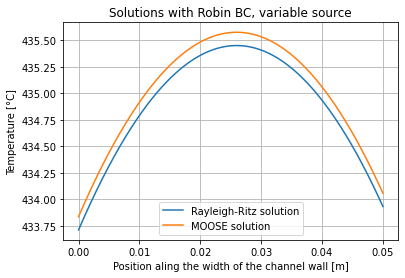

The value of the function at the leftmost end of the domain is: 433.71 [°C].
The value of the function at the rightmost end of the domain is: 433.93 [°C].
The value of the relative difference between the two solutions is: 8.330342E-08.


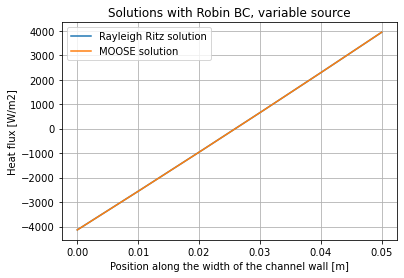

q_na computed =  [-4137.48897499]
q_nb computed =  [3938.936025]
The value of the relative difference between the two solutions is: 1.335098E-07.


In [31]:
'''Solution'''
'''Compute optimal coefficient vector'''
c_star_vec = np.linalg.solve(A_mtrx, b_vec)

#Importing MOOSE temperature vector
cam=pd.read_csv('output_Robin_variable_0002.csv',sep=",")
Temp_MOOSE=np.array(cam['u'][:])
Flux_MOOSE=np.array(cam['diffFluxU_r'][:])

plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),u_star(np.linspace(x_min,x_max,2000)),label='Rayleigh-Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Temp_MOOSE,label='MOOSE solution')
#plt.plot(np.linspace(x_min,x_max,2000),sol(np.linspace(x_min,x_max,2000)),label='Analytic solution')
plt.xlabel("Position aling the width of the channel wall [m]")
plt.ylabel("Temperature [°C]")
plt.title('Solutions with Robin BC, variable source')
plt.legend()
plt.grid()
plt.show()

print('The value of the function at the leftmost end of the domain is: %4.2f [°C].'%u_star(x_min))
print('The value of the function at the rightmost end of the domain is: %4.2f [°C].'%u_star(x_max))


#Calculate the L_2 norm error
x_1norm=np.sum((u_star(np.linspace(x_min,x_max,2000)))**2)
resnorm=np.sum((Temp_MOOSE-u_star(np.linspace(x_min,x_max,2000)))**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)


#Plotting the flux
plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000))),label='Rayleigh Ritz solution')
plt.plot(np.linspace(x_min,x_max,2000),Flux_MOOSE,label='MOOSE solution')
plt.xlabel("Position along the width of the channel wall [m]")
plt.ylabel("Heat flux [W/m2]")
plt.legend()
plt.title('Solutions with Robin BC, variable source')
plt.grid()
plt.show()

#print(sol(np.linspace(x_min,x_max,2000)))

'''Flux at boundary'''
print('q_na computed = ', -f_cond(x_min)*u_star_prime(x_min))
print('q_nb computed = ', -f_cond(x_max)*u_star_prime(x_max))
#print('q_nb given    = ', q_nb)
#print('flux error [%]= ',(-f_cond(x_max)*g_prime(x_max) - q_nb)/q_nb*100)

#Calculate the L_2 norm error (Flux)
hand_flux=-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000)))
x_1norm=np.sum((hand_flux)**2)
resnorm=np.sum((Flux_MOOSE-hand_flux)**2)
Rel_test=resnorm/x_1norm
print('The value of the relative difference between the two solutions is: %4E.'%Rel_test)

## [Conclusions](#toc)<a id="conclusions"></a>

The comparison between the values for the temperature obtained using the Rayleigh-Ritz method as implemented by using hand-written code and the ones obtained by MOOSE shows that these values were extremely close. Even the test showing the most divergence between the results shows a relative L2 error below 1E-6.

The model was implemented succesfully and some conclusions can be drawn by observing the results: The change in thermal conductivity according to position doesn't seem to affect the distribution of temperatures all that much, and so it also seems to be the case for the changes in source bias according to the position. It's still worth to note that the implementations of position dependence here were very rudimentary, the true implementation would come out of making both k and rho functions of temperature.

It is clear that using Robin boundary conditions is necessary for an adequate model of the bricks system. If the temperatures of the system are "anchored" due to the use of Dirichlet BCs, the high heat generation density will barely affect the temperature distribution in the bricks. Using Robin boundary conditions make the system take into values more expected to take into in real life.

We were not able to check for the possibility of thermal runway due to us being unable to make the conductivity and the source a function of temperature. This possibility will need to be evaluated in the future, when we manage to implement this.

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] Daniel Stack, [Development of high-temperature firebrick resistance-heated 
energy storage (FIRES) using doped ceramic heating system]()
- [4] Daniel Stack, Daniel Curtis, Charles Forsberg [Performance of firebrick resistance-heated energy storage for industrial heat applications and round-trip electricity storage]()
- [5] James F. Shackleford, [CRC Materials Science and Engineering Handbook]()
- [6] R. Bird, W. Stewart, E. Lightfoot [Transport Phenomena, Revised Second Edition]()
